# Analyzing Portfolio Risk and Return

### Import the Data

### Analyze the Performance

### Analyze the Volatility

### Analyze the Risk

### Analyze the Risk-Return Profile

#### Diversify the Portfolio

### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [1]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline


#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [2]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame
whale_navs_df = pd.read_csv(
    Path('./Resources/whale_navs.csv'), 
    index_col="date", 
    parse_dates=True, 
    infer_datetime_format=True
)

# Review the import by displaying both the head and tail functions
whale_navs_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [3]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
daily_returns_whales = whale_navs_df.pct_change().dropna()
# Review the first five rows of the daily returns DataFrame.\
daily_returns_whales.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'INVESTMENT FUNDS DAILY RETURNS vs S&P 500'}, xlabel='date'>

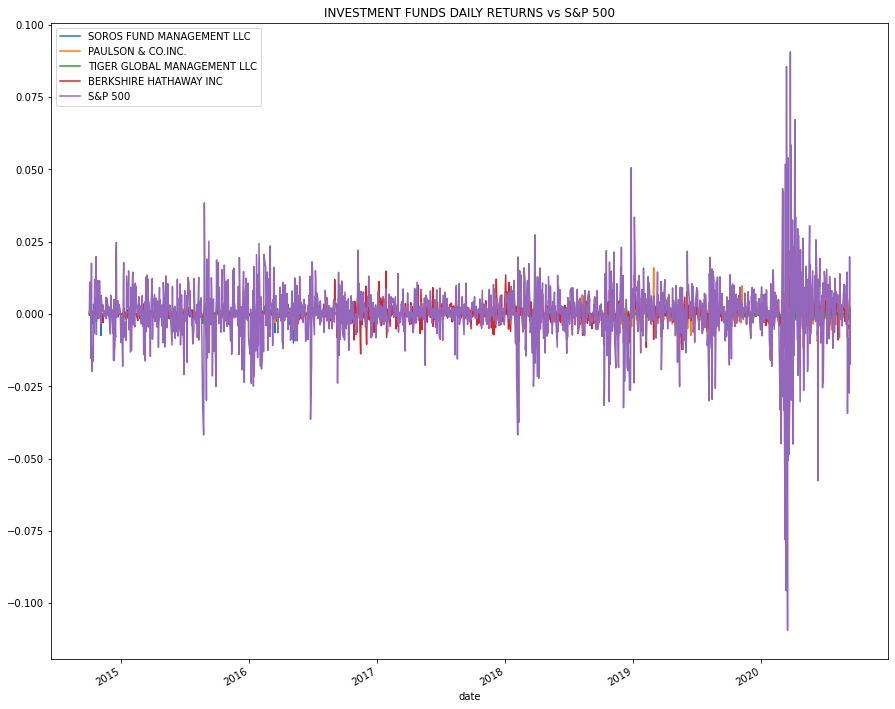

In [4]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
daily_returns_whales.plot(figsize=(15, 13), title="INVESTMENT FUNDS DAILY RETURNS vs S&P 500")

#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [5]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
sp500_cumulative_returns = (1 + daily_returns_whales[['S&P 500']]).cumprod()
soros_cumulative_returns = (1 + daily_returns_whales[['SOROS FUND MANAGEMENT LLC']]).cumprod()
paulson_cumulative_returns = (1 + daily_returns_whales[['PAULSON & CO.INC.']]).cumprod()
tiger_cumulative_returns = (1 + daily_returns_whales[['TIGER GLOBAL MANAGEMENT LLC']]).cumprod()
berkshire_cumulative_returns = (1 + daily_returns_whales[['BERKSHIRE HATHAWAY INC']]).cumprod()

# Review the last 5 rows of the cumulative returns DataFrame
display(sp500_cumulative_returns.tail())
display(soros_cumulative_returns.tail())
display(paulson_cumulative_returns.tail())
display(tiger_cumulative_returns.tail())
display(berkshire_cumulative_returns.tail())

,S&P 500
date,
2020-09-04,1.762645
2020-09-08,1.714484
2020-09-09,1.748341
2020-09-10,1.717983
2020-09-11,1.718858


,SOROS FUND MANAGEMENT LLC
date,
2020-09-04,0.987355
2020-09-08,0.985640
2020-09-09,0.986739
2020-09-10,0.985498
2020-09-11,0.985086


,PAULSON & CO.INC.
date,
2020-09-04,0.958187
2020-09-08,0.956378
2020-09-09,0.958409
2020-09-10,0.959740
2020-09-11,0.957887


,TIGER GLOBAL MANAGEMENT LLC
date,
2020-09-04,1.055714
2020-09-08,1.054373
2020-09-09,1.057221
2020-09-10,1.055539
2020-09-11,1.055081


,BERKSHIRE HATHAWAY INC
date,
2020-09-04,1.244856
2020-09-08,1.238608
2020-09-09,1.240858
2020-09-10,1.237883
2020-09-11,1.236625


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

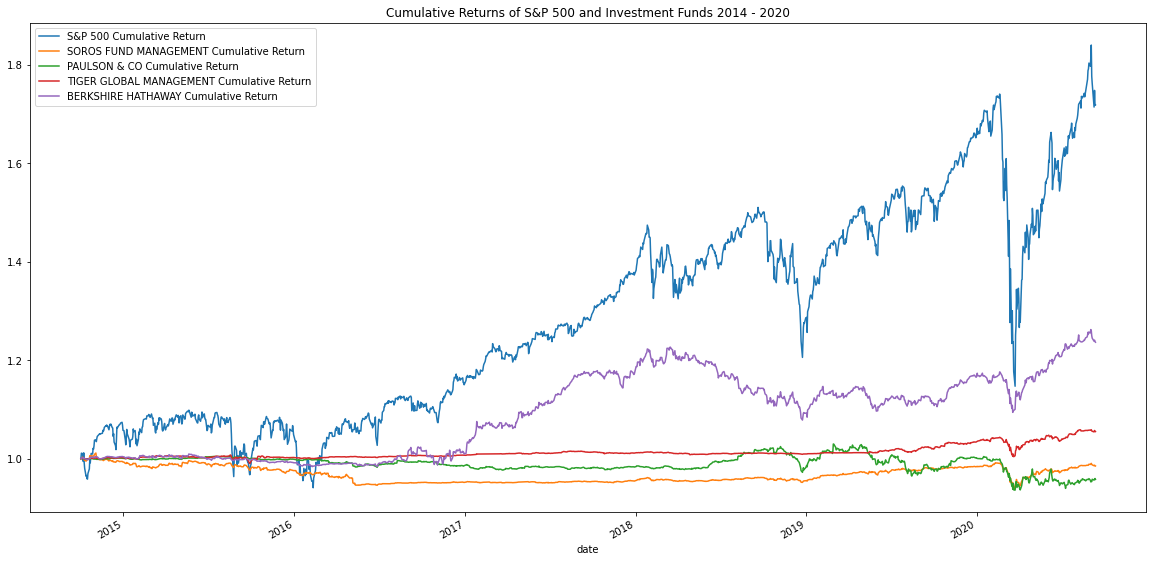

In [6]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
ax = sp500_cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns of S&P 500 and Investment Funds 2014 - 2020")
soros_cumulative_returns.plot(ax=ax)
paulson_cumulative_returns.plot(ax=ax)
tiger_cumulative_returns.plot(ax=ax)
berkshire_cumulative_returns.plot(ax=ax)


ax.legend(['S&P 500 Cumulative Return',
          'SOROS FUND MANAGEMENT Cumulative Return', 
          'PAULSON & CO Cumulative Return', 
          'TIGER GLOBAL MANAGEMENT Cumulative Return', 
          'BERKSHIRE HATHAWAY Cumulative Return'])


#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** No. Based on the numbers and the data visualized the S&P 500 outperforms all the funds' portfolios

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'INVESTMENT FUNDS DAILY RETURNS vs S&P 500'}>

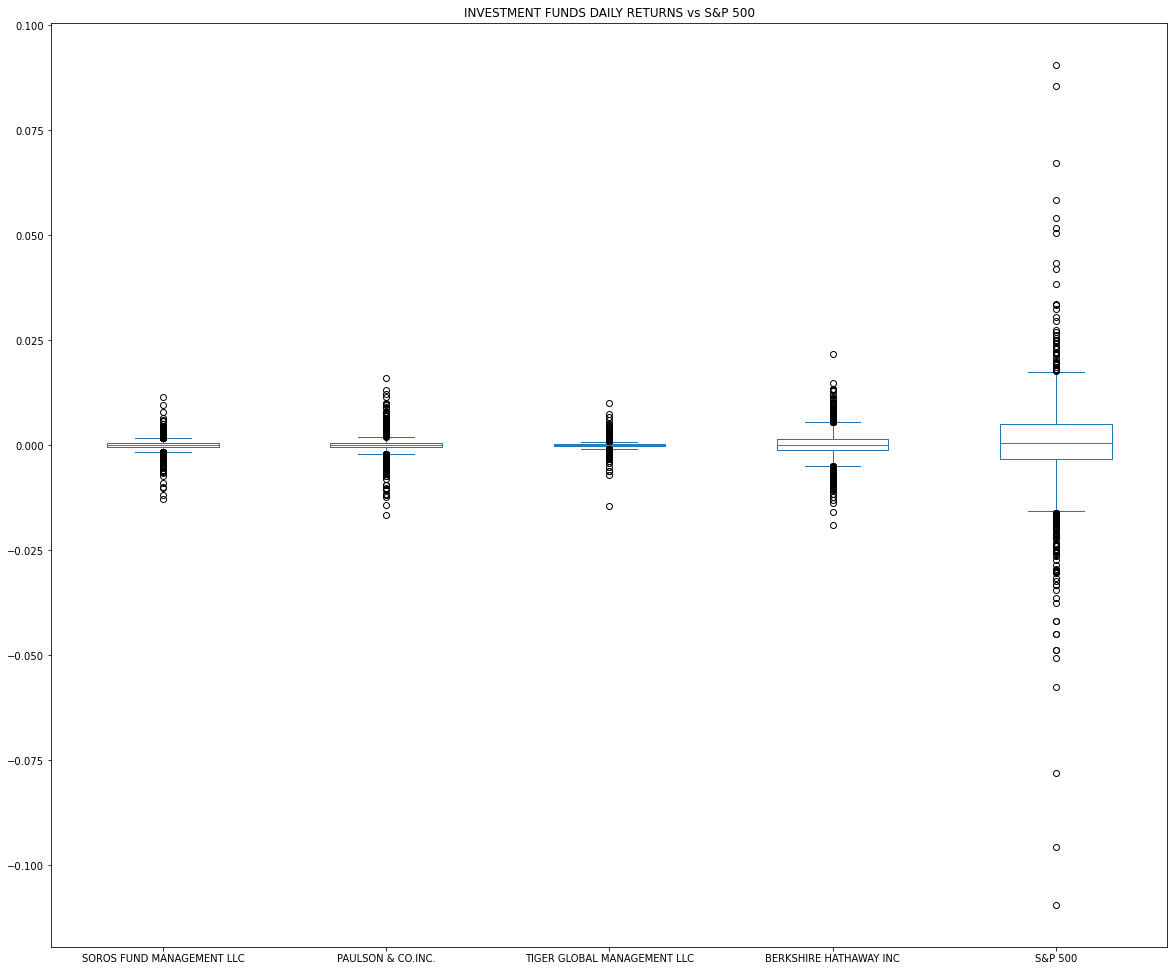

In [7]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
daily_returns_whales.plot.box(figsize=(20, 17), title="INVESTMENT FUNDS DAILY RETURNS vs S&P 500")

#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'INVESTMENT FUNDS DAILY RETURNS 2014 - 2020'}>

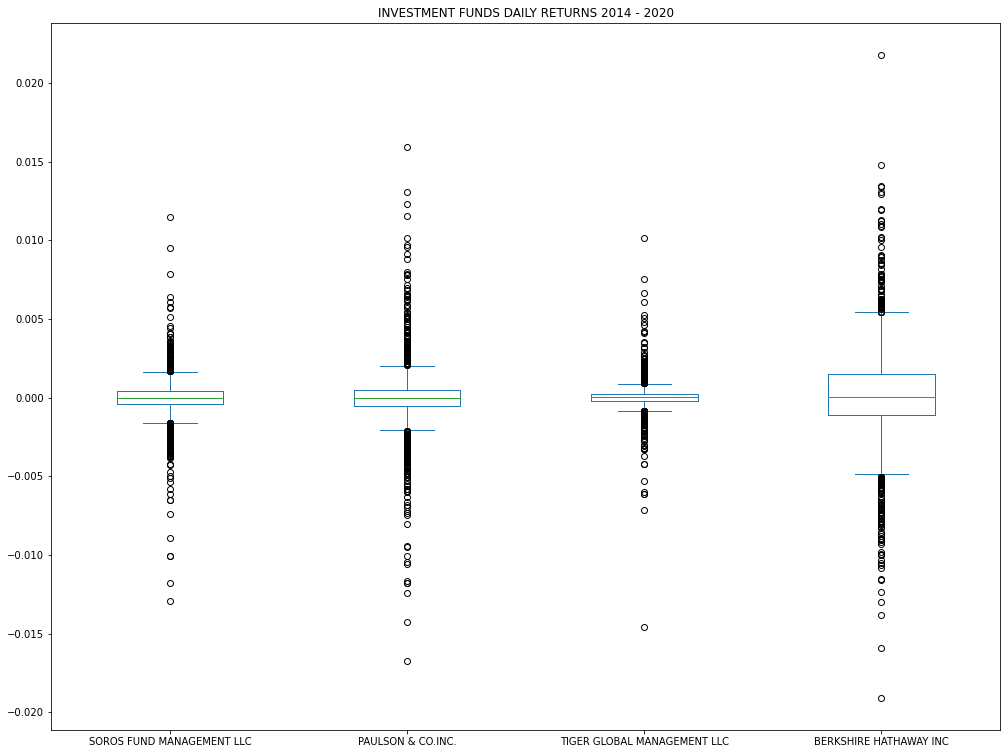

In [8]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
whale_funds_df = daily_returns_whales.drop(columns='S&P 500')
whale_funds_df.plot.box(figsize=(17, 13), title="INVESTMENT FUNDS DAILY RETURNS 2014 - 2020")

#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** Berkshire Hathaway was the most volatile and Tiger Global seems to have been the least volatile

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [9]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
standard_deviation = daily_returns_whales.std()

# Display results
standard_deviation.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [10]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
annualized_standard_deviation = standard_deviation * np.sqrt(252)

# Review the annual standard deviations smallest to largest
annualized_standard_deviation.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

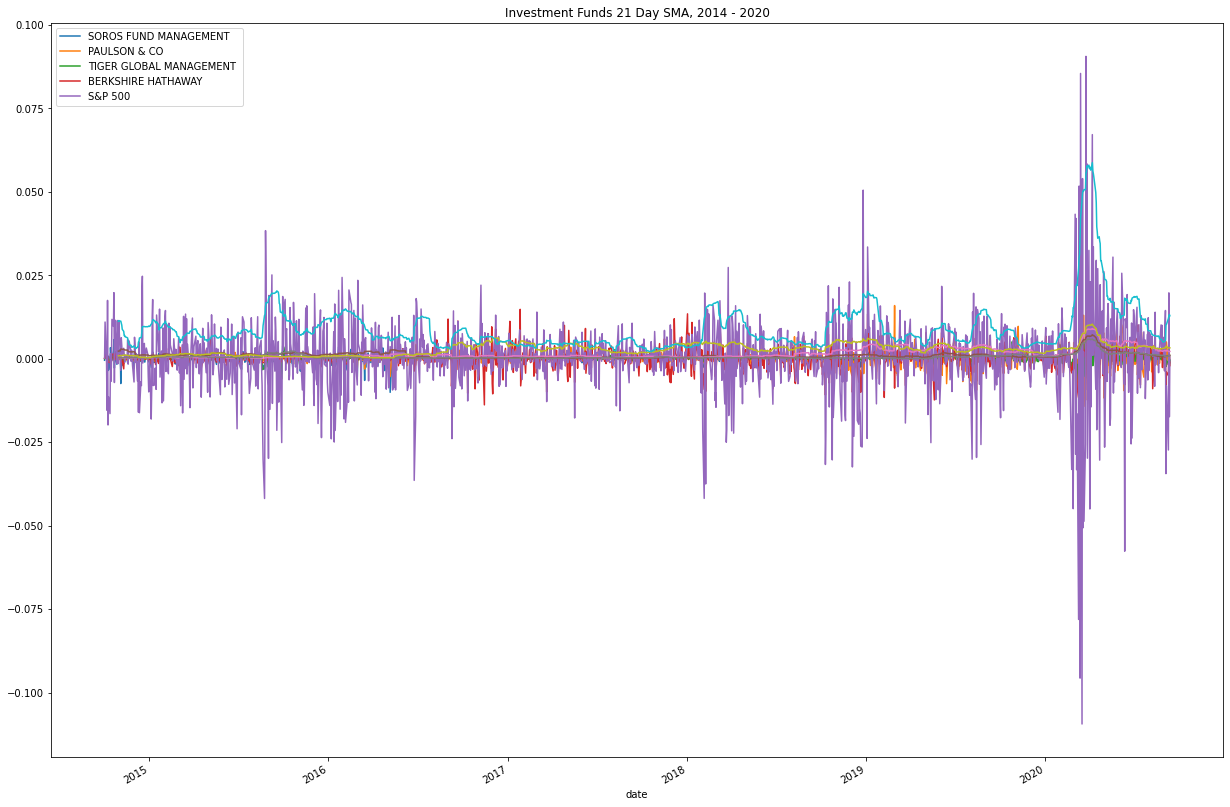

In [11]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
ax = daily_returns_whales.plot(figsize=(21,15), title="Investment Funds 21 Day SMA, 2014 - 2020")
daily_returns_whales.rolling(window=21).std().plot(ax=ax)
ax.legend(["SOROS FUND MANAGEMENT", "PAULSON & CO", "TIGER GLOBAL MANAGEMENT ", "BERKSHIRE HATHAWAY", "S&P 500"])

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

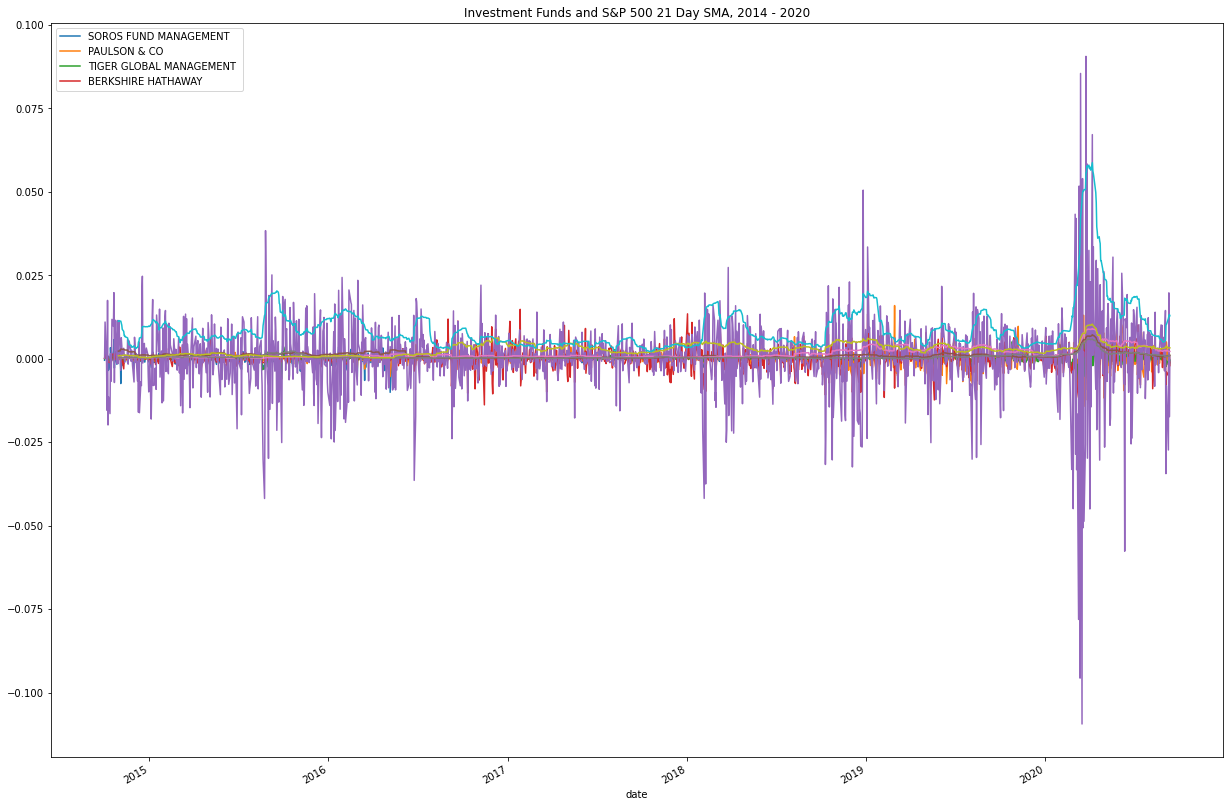

In [12]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
ax = daily_returns_whales.plot(figsize=(21,15), title="Investment Funds and S&P 500 21 Day SMA, 2014 - 2020")
daily_returns_whales.drop(columns='S&P 500')
daily_returns_whales.rolling(window=21).std().plot(ax=ax)
ax.legend(["SOROS FUND MANAGEMENT", "PAULSON & CO", "TIGER GLOBAL MANAGEMENT ", "BERKSHIRE HATHAWAY"])


#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** # None pose more risk

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** Yes the risk of each portfolio increases at the same time as the S&P 500


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** # Berkshire Hathaway poses the most risk.  This doesn't change over time against the other funds; however, one thing to note is that volatility seems to have more of an impact on Berkshire during very specific periods of time, while the others didn't seem to be affected as much during the same periods.

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [13]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
year_trading_days = 252
average_annual_return_whales = daily_returns_whales.mean() * year_trading_days
# Review the annual average returns sorted from lowest to highest
average_annual_return_whales

SOROS FUND MANAGEMENT LLC     -0.002281
PAULSON & CO.INC.             -0.006633
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [14]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
sharpe_ratios_whales = average_annual_return_whales / annualized_standard_deviation
# Review the Sharpe ratios sorted lowest to highest
sharpe_ratios_whales.sort_values()


PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Sharpe Ratios'}>

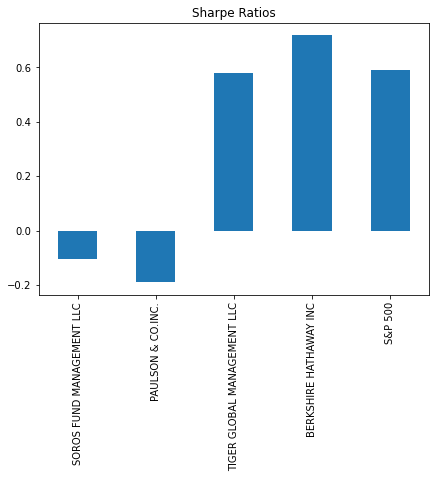

In [15]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
sharpe_ratios_whales.plot.bar(title="Sharpe Ratios", figsize=(7,5))


#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** Berkshire Hathaway offers the best ratio and Paulson & Co offers the worse.

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

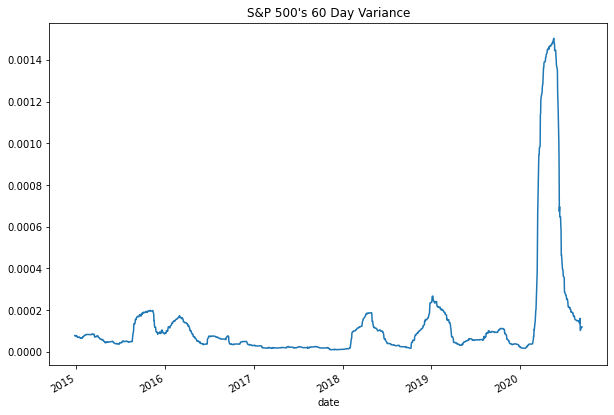

In [16]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
spx_500_var = daily_returns_whales['S&P 500'].rolling(window=60).var()
spx_500_var.plot(figsize=(10,7), title="S&P 500's 60 Day Variance")
spx_500_var.tail()

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [17]:
# Calculate the covariance using a 60-day rolling window
berkshire_covariance = daily_returns_whales['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(daily_returns_whales['BERKSHIRE HATHAWAY INC'])
# Review the last five rows of the covariance data
display(berkshire_covariance.tail())


date
2020-09-04    0.000012
2020-09-08    0.000012
2020-09-09    0.000012
2020-09-10    0.000012
2020-09-11    0.000012
Name: BERKSHIRE HATHAWAY INC, dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [18]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
berkshire_beta = berkshire_covariance / spx_500_var
# Review the last five rows of the beta information
print('Berkshire Hathaway Beta')
display(berkshire_beta.tail())

Berkshire Hathaway Beta


date
2020-09-04    0.112154
2020-09-08    0.101932
2020-09-09    0.097841
2020-09-10    0.097779
2020-09-11    0.098239
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [19]:
# Calculate the average of the 60-day rolling beta
berkshire_beta.mean()


0.216692662473561

##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':"Berkshire Hathaway's 60 Day Moving Beta"}, xlabel='date'>

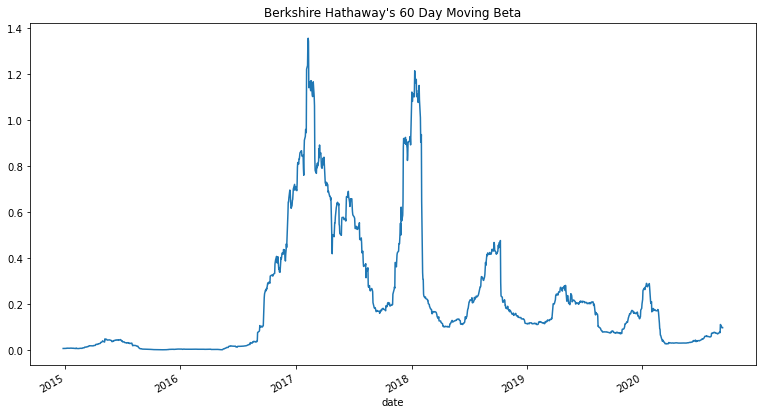

In [20]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
berkshire_beta.plot(figsize=(13,7), title="Berkshire Hathaway's 60 Day Moving Beta")

##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [21]:
# Calculate the covariance using a 60-day rolling window
paulson_covariance = daily_returns_whales['PAULSON & CO.INC.'].rolling(window=60).cov(daily_returns_whales['PAULSON & CO.INC.'])
# Review the last five rows of the covariance data
paulson_covariance.tail()


date
2020-09-04    0.000009
2020-09-08    0.000009
2020-09-09    0.000009
2020-09-10    0.000009
2020-09-11    0.000009
Name: PAULSON & CO.INC., dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [22]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
paulson_beta = paulson_covariance / spx_500_var
# Review the last five rows of the beta information
print('Paulson & Co Beta')
paulson_beta.tail()

Paulson & Co Beta


date
2020-09-04    0.088619
2020-09-08    0.078451
2020-09-09    0.073296
2020-09-10    0.072913
2020-09-11    0.073368
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [23]:
# Calculate the average of the 60-day rolling beta
paulson_beta.mean()

0.04539049599951572

##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':"Paulson & Co's 60 Day Moving Beta"}, xlabel='date'>

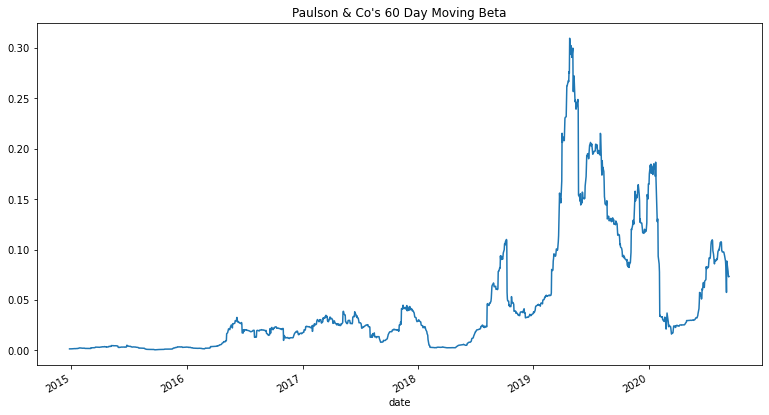

In [24]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
paulson_beta.plot(figsize=(13,7), title="Paulson & Co's 60 Day Moving Beta")

#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # YOUR ANSWER HERE


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # YOUR ANSWER HERE

---